In [1]:
import os
import h5py
import librosa
import itertools
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install patool

     |████████████████████████████████| 77 kB 4.6 MB/s 


In [4]:
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/genres_images.rar", outdir="/content")

patool: Extracting /content/drive/MyDrive/genres_images.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/genres_images.rar
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/genres_images.rar extracted to `/content'.


'/content'

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [6]:
import librosa
import librosa.display
# For reproducibility purposes
np.random.seed(42)

# Images

In [ ]:
src_dir = r'C:\Users\108652706\Documents\DOCUMENT_perso\ISI\Son\projet\genres\genres'
song_samples = 660000
genres = {'metal': 0, 'disco': 1, 'classical': 2, 'hiphop': 3, 'jazz': 4, 
          'country': 5, 'pop': 6, 'blues': 7, 'reggae': 8, 'rock': 9}
#genres = {'pop': 6, 'blues': 7, 'reggae': 8, 'rock': 9}
images_genre_dir= r"C:\Users\108652706\Documents\DOCUMENT_perso\ISI\Son\projet\genres_images"
data=[]
for x,y in genres.items():
     
        im_genre_path=images_genre_dir+"\\"+str(x)
        main_folder = src_dir+"\\"+x
        os.mkdir(im_genre_path)
        for root, subdirs, files in os.walk(main_folder):
            for file in files:
                file_name = main_folder + "\\" + file
                image_name = im_genre_path+"\\"+file[:-3]+"png"
                signal, sr = librosa.load(file_name)
                stft = librosa.stft(signal)
                Xdb = librosa.amplitude_to_db(abs(stft))
                plt.figure(figsize=(14, 5))
                librosa.display.specshow(Xdb, sr=sr)
                plt.axis('off')
                plt.savefig(image_name, bbox_inches='tight',pad_inches = 0) 
                plt.close()
                #add_image(image_name,data,y)
                
            
    

#Load images

In [7]:
import cv2
def add_image(image_name,data,y):
    #color
    #im= cv2.imread(image_name)
    #image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    #gray
    image = (cv2.imread(image_name, cv2.IMREAD_COLOR)/255).astype(np.float16)
    data.append([image,y])

In [8]:
from tqdm import tqdm
images_genre_dir= '/content/genres_images'
i=0
data=[]
for classe in tqdm(os.listdir(images_genre_dir)) :
    print(classe)
    file_name = os.path.join(images_genre_dir,classe)
    label = i  
    for name_image in tqdm(os.listdir(file_name)): 
        image= os.path.join(file_name,name_image)
        add_image(image,data,label)
    i+=1

  0%|          | 0/10 [00:00<?, ?it/s]

hiphop



 10%|█         | 1/10 [00:01<00:13,  1.55s/it]

metal



 20%|██        | 2/10 [00:03<00:12,  1.50s/it]

blues



 30%|███       | 3/10 [00:04<00:10,  1.48s/it]

disco



 40%|████      | 4/10 [00:05<00:08,  1.49s/it]

jazz



 50%|█████     | 5/10 [00:07<00:07,  1.47s/it]

rock



 60%|██████    | 6/10 [00:08<00:05,  1.48s/it]

classical



 70%|███████   | 7/10 [00:10<00:04,  1.45s/it]

reggae



 80%|████████  | 8/10 [00:11<00:02,  1.48s/it]

pop



 90%|█████████ | 9/10 [00:13<00:01,  1.50s/it]

country



100%|██████████| 10/10 [00:14<00:00,  1.49s/it]


In [ ]:
len(data)
data[0][0][0].dtype()

TypeError: ignored

In [9]:
random.shuffle(data) # shuffling the training data
X=[]
y=[]
n_classes=10
for features, label in data:
    X.append(features)
    y.append(label)
    
width,height,dimension= data[0][0].shape
X=np.array(X).reshape(-1,width,height,dimension)
y_c=to_categorical(y,n_classes)

In [10]:
y=y_c

In [ ]:
X[0]

array([[[0.753 , 0.298 , 0.2313],
        [0.957 , 0.5845, 0.447 ],
        [1.    , 0.714 , 0.5806],
        ...,
        [0.9766, 0.8115, 0.718 ],
        [0.996 , 0.7607, 0.639 ],
        [0.996 , 0.686 , 0.549 ]],

       [[0.753 , 0.298 , 0.2313],
        [0.9727, 0.612 , 0.4746],
        [1.    , 0.749 , 0.6235],
        ...,
        [0.996 , 0.686 , 0.549 ],
        [0.9844, 0.8   , 0.698 ],
        [0.9805, 0.8076, 0.714 ]],

       [[0.929 , 0.5293, 0.4   ],
        [0.965 , 0.5923, 0.4587],
        [1.    , 0.7373, 0.608 ],
        ...,
        [0.9883, 0.792 , 0.686 ],
        [0.957 , 0.8315, 0.757 ],
        [0.996 , 0.7725, 0.655 ]],

       ...,

       [[0.4902, 0.612 , 0.961 ],
        [0.537 , 0.6587, 0.9688],
        [0.549 , 0.6665, 0.9688],
        ...,
        [0.4197, 0.533 , 0.937 ],
        [0.408 , 0.5176, 0.933 ],
        [0.3647, 0.4707, 0.9136]],

       [[0.506 , 0.6274, 0.961 ],
        [0.6196, 0.7256, 0.9688],
        [0.6665, 0.7607, 0.961 ],
        .

In [ ]:
X.dtype

dtype('uint8')

In [11]:
#train test split 

X_train = X[:int(len(X)*.7)]
y_train = y[:int(len(X)*.7)]
X_val = X[int(len(X)*.7):int(len(X)*.8)]
y_val = y[int(len(X)*.7):int(len(X)*.8)]
X_test =  X[int(len(X)*.8):]
y_test = y[int(len(X)*.8):]

In [ ]:
X_train,X_TEST,y_train,y_TEST=train_test_split(X, y_c, test_size=0.3,random_state=13)

In [ ]:

X_test,X_val,y_test,y_val=train_test_split(X_TEST, y_TEST, test_size=1/3,random_state=13)

# Model vgg16

In [ ]:
import tensorflow as tf
import keras
from keras import optimizers
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Dropout, Input
from keras.applications.vgg16 import VGG16
#from keras.applications.resnet50 import ResNet50
import keras.applications as ka
from keras.callbacks import EarlyStopping
from keras.models import model_from_json


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 271, 781, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 271, 781, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 271, 781, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 135, 390, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 135, 390, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 135, 390, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 67, 195, 128)      0     

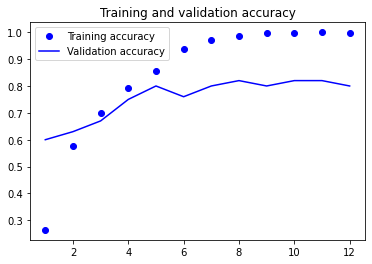

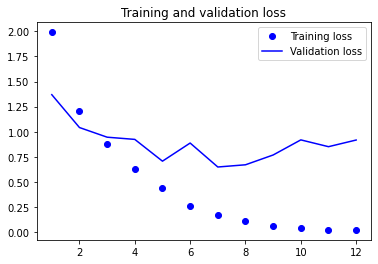

In [ ]:
vggmodel=VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(width,height,dimension), pooling=None)
vggmodel.summary()

for layer in vggmodel.layers[:-4]:
    layer.trainable = False

x = vggmodel.output
x = Flatten()(x)

x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(128, activation="elu")(x)
predictions = Dense(n_classes, activation="softmax")(x)

# creating the final model 
model_final = Model( vggmodel.input, predictions)

model_final.compile(loss = "kullback_leibler_divergence", optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
#kullback_leibler_divergence
model_final.summary()

early_stopping_monitor = EarlyStopping(patience=5)

history = model_final.fit(X_train, y_train, batch_size=10, epochs=25,callbacks=[early_stopping_monitor], validation_data=(X_val, y_val))

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [24]:
score = model_final.evaluate(X_test, y_test,verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 4s 256ms/step - loss: 2.2989 - accuracy: 0.1350
Test loss: 2.2988507747650146
Test accuracy: 0.13500000536441803


#Model 2

In [17]:
y.shape

(1000, 10)

In [23]:
#Initiating the model as Sequential
model = Sequential()

#Adding the CNN layers along with some drop outs and maxpooling
model.add(Conv2D(64, (3,2), activation = 'relu', input_shape = (X_train.shape[1:])))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Dropout(0.1))
model.add(Conv2D(256, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Dropout(0.1))
model.add(Conv2D(512, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Dropout(0.1))

#flattening the data to be passed to a dense layer
model.add(Flatten())

#Adding the dense layers
model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))

#final output layer with 10 predictions to be made
model.add(Dense(10, activation = 'softmax'))

'''
Optimizer = Adam
Loss = Sparse Categorical CrossEntropy
'''
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 269, 780, 64)      1216      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 260, 64)      0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 89, 260, 64)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 259, 128)      49280     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 29, 86, 128)      0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 29, 86, 128)      

In [ ]:
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50)
history = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=(X_val, y_val))


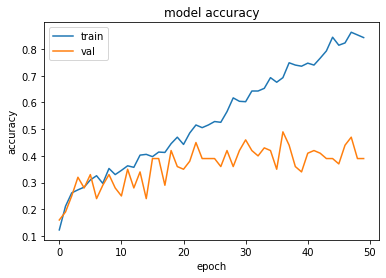

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score = model_final.evaluate(X_test, y_test,verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])